In [22]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import imgaug.augmenters as iaa

# Set up directories for male and female images
male_dir = "E:\python files\Male"
female_dir = "E:\python files\Female"

# Preprocessing function to resize and preprocess images
def preprocess(img):
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    return img

# Load male and female images into arrays and preprocess them
male_images = []
for img_file in os.listdir(male_dir):
    img = cv2.imread(os.path.join(male_dir, img_file))
    img = preprocess(img)
    male_images.append(img)

female_images = []
for img_file in os.listdir(female_dir):
    img = cv2.imread(os.path.join(female_dir, img_file))
    img = preprocess(img)
    female_images.append(img)

# Combine male and female images into a single dataset and labels array
X = np.concatenate((male_images, female_images))
y = np.concatenate((np.ones(len(male_images)), np.zeros(len(female_images))))

# Apply image augmentations to the dataset
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.Affine(rotate=(-45, 45)), # rotate images by -45 to 45 degrees
    iaa.LinearContrast((0.75, 1.5)), # adjust contrast of images
    iaa.Multiply((0.8, 1.2)) # multiply pixel values with random values between 0.8 to 1.2
])

X_augmented = seq.augment_images(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.2, random_state=42)

# Encode labels as integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train SVM model on training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Test SVM model on testing data and evaluate accuracy
y_pred = clf.predict(X_test)

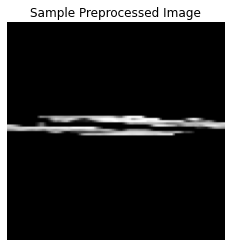

In [23]:
import matplotlib.pyplot as plt

# Select a random sample index
sample_index = np.random.randint(len(X_train))  # or len(X_test) for test dataset

# Retrieve the corresponding preprocessed image
sample_image = X_train[sample_index]  # or X_test[sample_index]

# Reshape the flattened image to its original shape
sample_image = sample_image.reshape((100, 100))

# Display the sample preprocessed image
plt.imshow(sample_image, cmap='gray')
plt.title("Sample Preprocessed Image")
plt.axis('off')
plt.show()

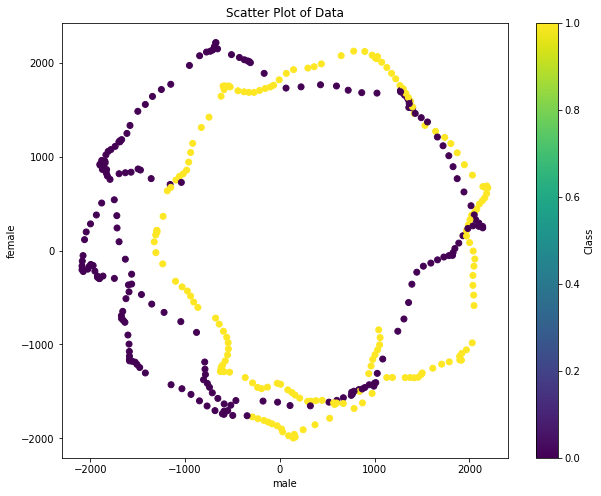

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("Scatter Plot of Data")
plt.xlabel("male")
plt.ylabel("female")
plt.colorbar(label="Class")
plt.show()

In [25]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA


# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a DataFrame with the PCA results
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['Class'] = y_train

# Create scatter plot using Plotly
fig = px.scatter(df, x='PC1', y='PC2', color='Class', color_continuous_scale='viridis')

# Set plot labels and title
fig.update_layout(
    title="Scatter Plot of Data",
    xaxis_title="PC1",
    yaxis_title="PC2"
)

fig.show()

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB

In [27]:
models = {
    "Logistic Regression": LogisticRegression(C=0.1),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=10),
    "Gradient Boosting": GradientBoostingClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "SVM (Gamma='scale')": SVC(gamma='scale'),
    "SVM (Gamma='auto')": SVC(gamma='auto'),
    "NuSVM": NuSVC(),
    "Linear SVM": LinearSVC(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTreeClassifier (max_depth=5)": DecisionTreeClassifier(max_depth=5)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results.append([name, train_acc, test_acc, f1, precision, recall])

df_results = pd.DataFrame(results, columns=["Model Name", "Training Accuracy", "Test Accuracy", "F1 Score", "Precision", "Recall"])

c:\Users\Ranil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [28]:
df_results

,Model Name,Training Accuracy,Test Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
3,Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000
4,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
5,Naive Bayes,0.994638,1.000000,1.000000,1.000000,1.000000
6,Support Vector Machine,1.000000,1.000000,1.000000,1.000000,1.000000
7,SVM (Gamma='scale'),1.000000,1.000000,1.000000,1.000000,1.000000
8,SVM (Gamma='auto'),1.000000,0.542553,0.381658,0.294364,0.542553
9,NuSVM,0.997319,1.000000,1.000000,1.000000,1.000000


Epoch 1/100
10/10 [==============================] - 1s 16ms/step - loss: 0.9196 - accuracy: 0.6997 - val_loss: 0.0788 - val_accuracy: 0.9394
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6320 - accuracy: 0.8874 - val_loss: 0.0602 - val_accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5501 - accuracy: 0.9147 - val_loss: 0.0477 - val_accuracy: 0.9697
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2925 - accuracy: 0.9283 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0773 - accuracy: 0.9795 - val_loss: 0.0461 - val_accuracy: 0.9697
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1481 - accuracy: 0.9625 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0703 - accuracy: 0.9829 - val_loss: 9.6289e-04 - val_accuracy: 1.0000
Epoch 8/

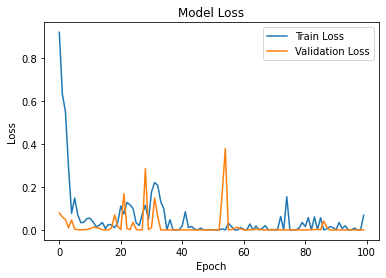

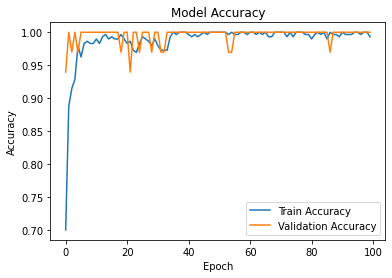

5/5 [==============================] - 0s 90us/step


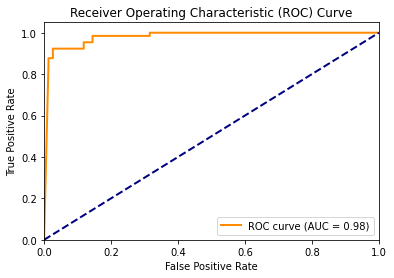

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming X, y, and the model are already defined as per your previous code

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep learning model (rename it to QTHCNN-SVM)
model = Sequential(name="QTHCNN-SVM")
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store accuracy history
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

# Plot loss vs. epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

# Plot accuracy vs. epoch
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_scaled)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show();

In [30]:
model.summary()

Model: "QTHCNN-SVM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644289 (2.46 MB)
Trainable params: 644289 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
import plotly.graph_objects as go
fig = go.Figure()

# Add the accuracy trace
fig.add_trace(go.Scatter(x=np.arange(1, len(history.history['accuracy']) + 1),
                         y=history.history['accuracy'],
                         mode='lines',
                         name='Accuracy'))

# Update layout
fig.update_layout(title='Model Accuracy',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

# Show the plot
fig.show()

In [32]:
# Train the model and store accuracy history
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/40
9/9 [==============================] - 0s 13ms/step - loss: 0.0441 - accuracy: 0.9846 - val_loss: 0.0670 - val_accuracy: 0.9848
Epoch 2/40
9/9 [==============================] - 0s 7ms/step - loss: 0.0883 - accuracy: 0.9885 - val_loss: 0.6432 - val_accuracy: 0.9545
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 0.4666 - accuracy: 0.9769 - val_loss: 7.2271e-05 - val_accuracy: 1.0000
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0455 - accuracy: 0.9962 - val_loss: 3.1398e-06 - val_accuracy: 1.0000
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 9.2308e-05 - accuracy: 1.0000 - val_loss: 3.7868e-04 - val_accuracy: 1.0000
Epoch 6/40
9/9 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 0.9962 - val_loss: 7.0385e-04 - val_accuracy: 1.0000
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 0.0589 - accuracy: 0.9962 - val_loss: 0.0227 - val_accuracy: 0.9848
Epoch 8/40
9/

In [33]:
validation_accuracy = history.history['val_accuracy']

# Create an interactive plot using Plotly
fig = go.Figure()

# Add the validation accuracy trace
fig.add_trace(go.Scatter(x=np.arange(1, len(validation_accuracy) + 1),
                         y=validation_accuracy,
                         mode='lines',
                         name='Validation Accuracy'))

# Update layout
fig.update_layout(title='Validation Accuracy',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

# Show the plot
fig.show()

C:\Users\Ranil\AppData\Local\Temp\ipykernel_13540\1758661868.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ranil\AppData\Local\Temp\ipykernel_13540\1758661868.py:21: UserWarning:

The palette list has more values (15) than needed (14), which may not be intended.



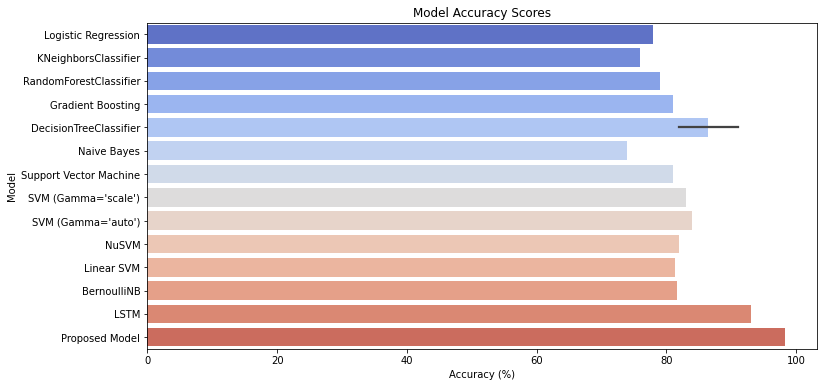

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model names and their corresponding accuracy scores
models = [
    "Logistic Regression", "KNeighborsClassifier", "RandomForestClassifier",
    "Gradient Boosting", "DecisionTreeClassifier", "Naive Bayes",
    "Support Vector Machine", "SVM (Gamma='scale')", "SVM (Gamma='auto')",
    "NuSVM", "Linear SVM", "BernoulliNB", "DecisionTreeClassifier","LSTM" , "Proposed Model"
]

accuracy_scores = [
    78, 76, 79, 81, 82, 74, 81, 83, 84, 82, 81.3, 81.7, 91,93, 98.3
]

# Set a color palette for the bars
colors = sns.color_palette("coolwarm", len(models))

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=accuracy_scores, y=models, palette=colors)

# Add labels and a title
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Model Accuracy Scores")

# Show the plot
plt.show()

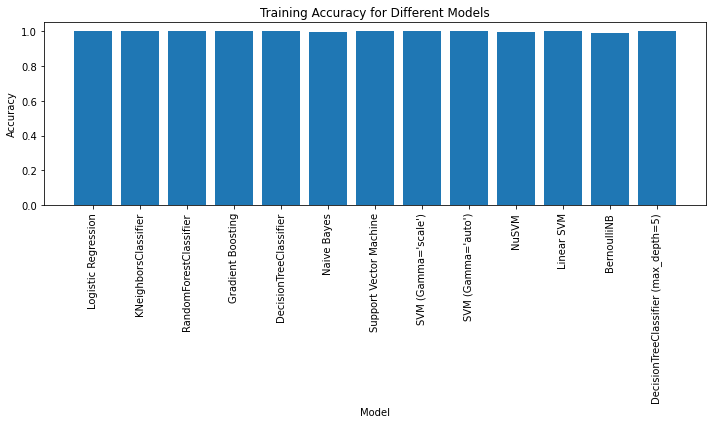

In [35]:
# Plotting Training Accuracy
plt.figure(figsize=(10, 6))
plt.bar(df_results["Model Name"], df_results["Training Accuracy"])
plt.title("Training Accuracy for Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
fig = go.Figure(data=[go.Bar(x=df_results["Model Name"], y=df_results["Training Accuracy"])])

# Update layout
fig.update_layout(title="Training Accuracy for Different Models",
                  xaxis_title="Model",
                  yaxis_title="Accuracy",
                  xaxis_tickangle=-45,
                  bargap=0.2)

# Show the plot
fig.show()

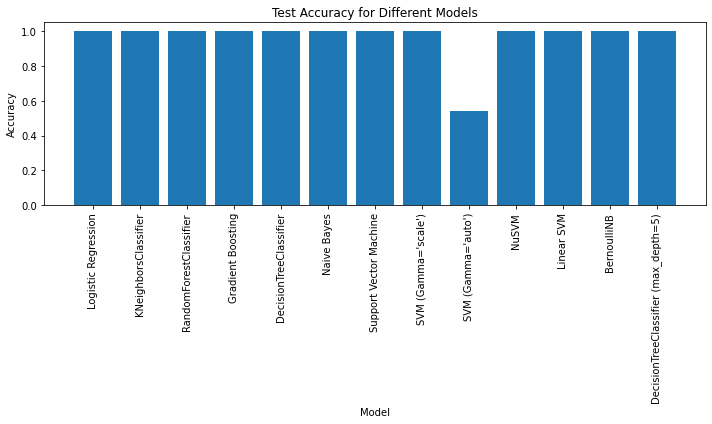

In [37]:
# Plotting Test Accuracy
plt.figure(figsize=(10, 6))
plt.bar(df_results["Model Name"], df_results["Test Accuracy"])
plt.title("Test Accuracy for Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
fig = go.Figure(data=[go.Bar(x=df_results["Model Name"], y=df_results["Test Accuracy"])])

# Update layout
fig.update_layout(title="Test Accuracy for Different Models",
                  xaxis_title="Model",
                  yaxis_title="Accuracy",
                  xaxis_tickangle=-45,
                  bargap=0.2)

# Show the plot
fig.show()

In [39]:
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = preprocess(img)
    img = cv2.resize(img, (100, 100))  # Resize to (100, 100)
    img = img.reshape(1, -1)  # Reshape to (1, 10000)
    return img

# Path to the new image
new_image_path = r"E:\python files\Female\image_006.jpeg"
new_image = load_and_preprocess_image(new_image_path)
new_image_augmented = seq.augment_images([new_image])
augmented_image = new_image_augmented[0]
new_image_reshaped = augmented_image.reshape(1, -1)
prediction = clf.predict(new_image_reshaped)
if prediction[0] == 1:
    predicted_label = "male"
else:
    predicted_label = "female"
print("Predicted label:", predicted_label)

Predicted label: female


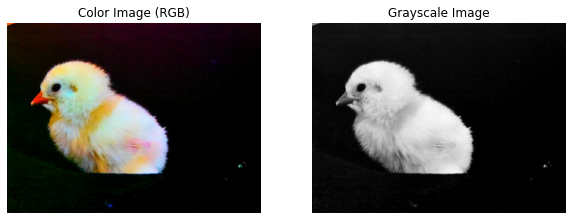

In [1]:
import cv2
import matplotlib.pyplot as plt

def display_img(image_path):
    color_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
    grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(color_image_rgb)
    plt.title('Color Image (RGB)')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
display_img(r"E:\python files\Female\image_006.jpeg")

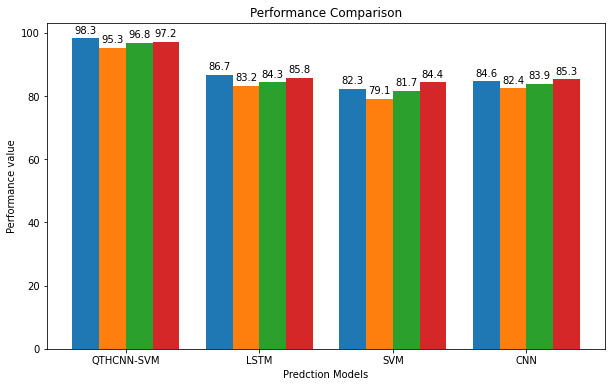

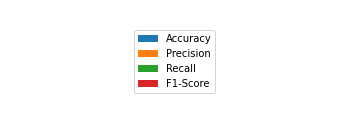

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Models
models = ['QTHCNN-SVM', 'LSTM', 'SVM', 'NN']

# Performance metrics
accuracy = [98.3, 86.7, 82.3, 84.6]
precision = [95.3, 83.2, 79.1, 82.4]
recall = [96.8, 84.3, 81.7, 83.9]
f1_score = [97.2, 85.8, 84.4, 85.3]

# Set the positions and width for bars
positions = np.arange(len(models))
width = 0.2  # Width of each bar

# Define colors for each metric
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the main bar plot
plt.figure(figsize=(10, 6))

bar1 = plt.bar(positions - 1.5 * width, accuracy, width, label='Accuracy', color=colors[0])
bar2 = plt.bar(positions - 0.5 * width, precision, width, label='Precision', color=colors[1])
bar3 = plt.bar(positions + 0.5 * width, recall, width, label='Recall', color=colors[2])
bar4 = plt.bar(positions + 1.5 * width, f1_score, width, label='F1-Score', color=colors[3])

plt.xlabel('Predction Models')
plt.ylabel('Performance value')
plt.title('Performance Comparison')
plt.xticks(positions, models)

# Function to add values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

add_values(bar1)
add_values(bar2)
add_values(bar3)
add_values(bar4)

plt.grid(False)

# Create a separate legend plot
legend_fig = plt.figure(figsize=(6, 2))
ax = legend_fig.add_subplot(111)
ax.axis('off')
ax.legend(handles=[bar1, bar2, bar3, bar4], labels=['Accuracy', 'Precision', 'Recall', 'F1-Score'], loc='center')

plt.show()

### MIKKA NANDRI GUYCH

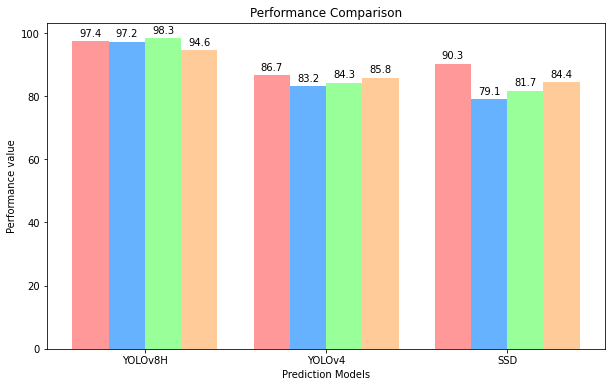

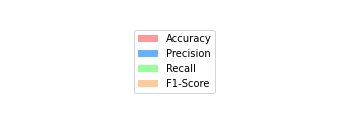

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Models
models = ['YOLOv8H', 'YOLOv4', 'SSD']

# Performance metrics
accuracy = [97.4, 86.7, 90.3]
precision = [97.24, 83.2, 79.1]
recall = [98.35, 84.3, 81.7]
f1_score = [94.58, 85.8, 84.4]

# Set the positions and width for bars
positions = np.arange(len(models))
width = 0.2  # Width of each bar

# Define a visually appealing color palette
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Create the main bar plot
plt.figure(figsize=(10, 6))

bar1 = plt.bar(positions - 1.5 * width, accuracy, width, label='Accuracy', color=colors[0])
bar2 = plt.bar(positions - 0.5 * width, precision, width, label='Precision', color=colors[1])
bar3 = plt.bar(positions + 0.5 * width, recall, width, label='Recall', color=colors[2])
bar4 = plt.bar(positions + 1.5 * width, f1_score, width, label='F1-Score', color=colors[3])

plt.xlabel('Prediction Models')
plt.ylabel('Performance value')
plt.title('Performance Comparison')
plt.xticks(positions, models)

# Function to add values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

add_values(bar1)
add_values(bar2)
add_values(bar3)
add_values(bar4)

plt.grid(False)

# Create a separate legend plot
legend_fig = plt.figure(figsize=(6, 2))
ax = legend_fig.add_subplot(111)
ax.axis('off')
ax.legend(handles=[bar1, bar2, bar3, bar4], labels=['Accuracy', 'Precision', 'Recall', 'F1-Score'], loc='center')

plt.show()

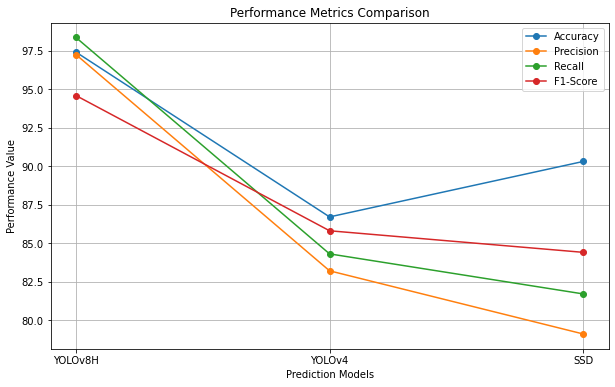

In [42]:
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, f1_score, marker='o', label='F1-Score')

plt.xlabel('Prediction Models')
plt.ylabel('Performance Value')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.grid(True)

plt.show()